## Decision Trees

#### Table of Contents

- [Preliminaries](#Preliminaries)
- [Classification](#Classification)
- [Pruning](#Pruning)
- [Regression](#Regression)

We can use decision trees for classification or regression:

- `sklearn.tree.DecisionTreeClassifier()`
- `sklearn.tree.DecisionTreeRegressor()`

They operate in the same manner, but for different problems.

*******
# Preliminaries
[TOP](#Decision-Trees)

We are going to use the titanic data from lecture to show how to implement classification and regression decision trees.

In [17]:
# utilities
import pandas as pd

# processing
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

#algorithms
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

# plotting
import matplotlib.pyplot as plt

In [9]:
titanic = pd.read_csv('titanic3.csv')
titanic.head(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"


Select the following variables to match [Varian (2014)](https://www.aeaweb.org/articles?id=10.1257/jep.28.2.3):

- `pclass`
- `survived`
- `sex`
- `age`
- `sibsp`

In [10]:
df = titanic[['pclass', 'survived', 'sex', 'age', 'sibsp']].copy()

Check for any `NAs`. 

In [11]:
df.isnull().any()

pclass      False
survived    False
sex         False
age          True
sibsp       False
dtype: bool

If there are any `NAs`, drop them.

In [12]:
df.dropna(inplace = True)

Print the head.

Notice by printing the head that we have three categorical variables:

1. `survived` - our label
2. `sex` - string
3. `pclass` - an _**ordered**_ numeric categorical variable

In [13]:
df.head()

,pclass,survived,sex,age,sibsp
0,1,1,female,29.00,0
1,1,1,male,0.92,1
2,1,0,female,2.00,1
3,1,0,male,30.00,1
4,1,0,female,25.00,1


Decision trees only need dummies for non-ordered categorical variables.
Adjust `sex` to be a dummy variable.

In [15]:
df = df.drop(columns = 'sex').join(pd.get_dummies(df['sex'], drop_first = True))
df.head()

,pclass,survived,age,sibsp,male
0,1,1,29.00,0,0
1,1,1,0.92,1,1
2,1,0,2.00,1,0
3,1,0,30.00,1,1
4,1,0,25.00,1,0


We are going to use the whole data (no train-test split).
The reason why is because we are using the data for the entire universe of Titanic passengers.

Define `x` and `y`.

Convert `y` to a `string` and then a `category`.

In [16]:
y = df['survived'].astype('string').astype('category')
x = df.drop(columns = 'survived')

***********
# Classification
[TOP](#Decision-Trees)
    
The Varian (2014) paper has 7 terminal nodes.
Let's create it!

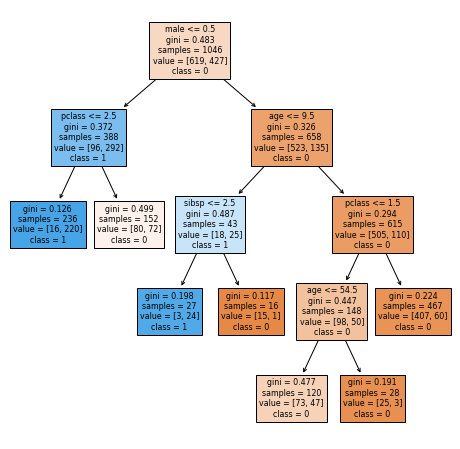

In [23]:
plt.figure(figsize = (8, 8))
clf_7 = DecisionTreeClassifier(random_state = 490,
                              max_leaf_nodes = 7)
clf_7.fit(x, y)

_ = plot_tree(clf_7,
             feature_names = x.columns,
             class_names = y.cat.categories,
             filled = True)

*********
# Pruning
[TOP](#Decision-Trees)

Pruning is just cross-validating the optimal number of terminal nodes.
I hope CV is becoming familiar by now.

In [24]:
param_grid = {
    'max_leaf_nodes': range(1, 11)
}

clf_tree_cv = DecisionTreeClassifier(random_state = 490)

grid_search = GridSearchCV(clf_tree_cv, param_grid,
                          cv = 6,
                          scoring = 'accuracy',
                          n_jobs = 10).fit(x, y)

best = grid_search.best_params_
best

{'max_leaf_nodes': 2}

Fit the optimal model and plot the tree.

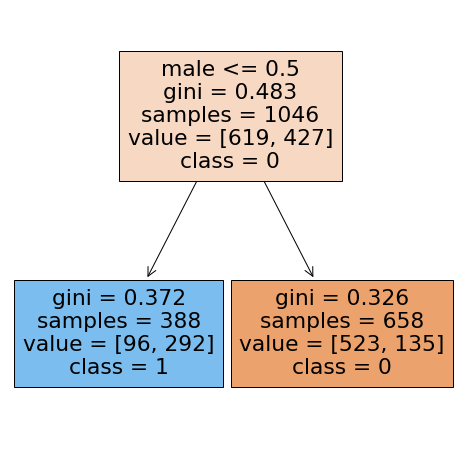

In [26]:
plt.figure(figsize = (8, 8))
clf_2 = DecisionTreeClassifier(random_state = 490,
                              max_leaf_nodes = 2)
clf_2.fit(x, y)

_ = plot_tree(clf_2,
             feature_names = x.columns,
             class_names = y.cat.categories,
             filled = True)

***********
# Regression
[TOP](#Decision-Trees)

Regression works in the same way as classification. 
Let's do an example!

Let's predict the `fare` column.

In [27]:
df2 = df.join(titanic['fare'])

Check for `NaN`s

In [28]:
df2.isnull().any()

pclass      False
survived    False
age         False
sibsp       False
male        False
fare         True
dtype: bool

If there are any `NaN`s, drop them.

In [29]:
df2.dropna(inplace = True)

Create `x` and `y`.

In [30]:
y = df2['fare']
x = df2.drop(columns = 'fare')

Let's fit a regression decision tree with five terminal nodes.

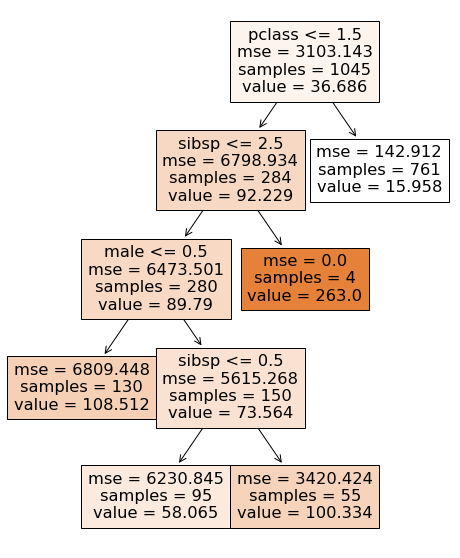

In [31]:
plt.figure(figsize = (8, 10))

reg_5 =  DecisionTreeRegressor(max_leaf_nodes = 5)
reg_5.fit(x, y)

_ = plot_tree(reg_5,
             feature_names = x.columns,
             filled = True)

We could prune this tree, however, it is identical to the clasification decision tree.

So, eh?